In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


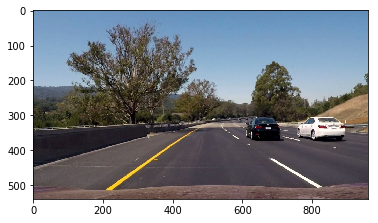

In [2]:
#reading in an image
image = mpimg.imread('test_images/challenge2.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

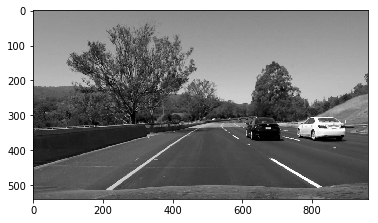

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #grayscale conversion
plt.imshow(gray, cmap='gray')

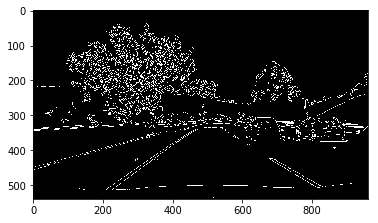

In [4]:
low_threshold = 47
high_threshold = 160
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(edges, cmap='Greys_r')

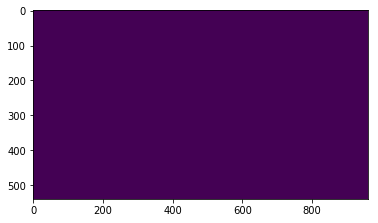

In [22]:
mask = np.zeros_like(edges)   
ignore_mask_color = 255   
plt.imshow(mask)
# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(180,imshape[0]),(450,329), (500,320), (820,imshape[0])]], dtype=np.int32)
#vertices = np.array([[(220,480),(400,400), (600,400), (780,480)]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)
#plt.imshow(masked_edges)

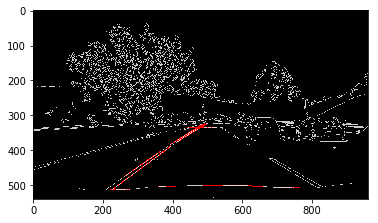

In [24]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15     # minimum number of votes (intersections in Hough grid cell)
min_line_length =40 #minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),2)

print 
# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)

In [15]:
old_r=1
old_l=1
old_right=0
old_left=0
old_intercept_r=0
old_intercept_l=0


In [21]:
r=0
right=0
l=0
left=0
intercept_r=0
intercept_l=0
for line in lines:
    for x1,y1,x2,y2 in line:
        if (((y2-y1)/(x2-x1)) > 1) | (((y2-y1)/(x2-x1)) <-1) | ((x2-x1)==0):
            a=1
        elif ((y2-y1)/(x2-x1))>0:
            right=right+((y2-y1)/(x2-x1))
            r=r+1
            intercept_r=intercept_r+y2-((y2-y1)/(x2-x1))*x2
        elif ((y2-y1)/(x2-x1)) <0:
            left=left+((y2-y1)/(x2-x1))
            l=l+1
            intercept_l=intercept_l+y2-((y2-y1)/(x2-x1))*x2
             
   
if (r==0): 
    r=old_r
    intercept_r=old_intercept_r       
    right=old_right
        
        
if (l==0):
    l=old_l
    intercept_l=old_intercept_l
        
p=0.2
q=0.8
mean_right=p*(right/r)+q*(old_right/old_r)
mean_left=p*(left/l)+q*(old_left/old_l)
mean_right_intercept=p*(intercept_r/r)+q*(old_intercept_r/old_r)
mean_left_intercept=p*(intercept_l/l)+q*(old_intercept_l/old_l)
    
            

"First number is {} and second number is {} {} {} {} {}".format(mean_right, mean_left,mean_right_intercept,mean_left_intercept,r,l) 

ValueError: not enough values to unpack (expected 4, got 3)

In [ ]:
Y1=655
Y2=330
X1=int((Y1-mean_left_intercept)/mean_left)
X2=int((Y2-mean_left_intercept)/mean_left)


Y11=650
Y22=330
X11=int((Y11-mean_right_intercept)/mean_right)
X22=int((Y22-mean_right_intercept)/mean_right)

old_r = r
   
old_l = l
    
old_right = right
   
old_left = left
   
old_intercept_r = intercept_r
    
old_intercept_l = intercept_l
lines = np.copy(image)*0
cv2.line(lines,(X1,Y1),(X2,Y2),(255,0,0),10)
cv2.line(lines,(X11,Y11),(X22,Y22),(255,0,0),10)
image_weighted=cv2.addWeighted(image,0.8,lines,2.0,0)
plt.imshow(image_weighted)